# config Settings
<div class="alert alert-block alert-info">
<b> 显示这样效果的源代码在下方 </b> 
</div>

In [ ]:
<div class="alert alert-block alert-info">
<b>raw link :</b> 
</div>

## jupyter notebook theme

jt -t monokai -f firacode -cellw 95% -fs 10 -tf fira -tfs 8 -nf firacode -nfs 8 -dfs 8 -lineh 120 -T  # set to be sublime alike style

## basic 
numpy, pandas, matplotlib, path-settings

In [2]:
from __future__ import print_function
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity='all'

from matplotlib import pyplot as plt
%pylab inline

# %load_ext autoreload
# %autoreload 2
import numpy as np
import pandas as pd 
pd.options.display.max_rows=5  # 设置dataframe最多的显示行数
import os
import sys
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())
    print(f"After inserting, sys.path is {sys.path}")

Populating the interactive namespace from numpy and matplotlib
After inserting, sys.path is ['/home/hesy/.conda/envs/py36/lib/python36.zip', '/home/hesy/.conda/envs/py36/lib/python3.6', '/home/hesy/.conda/envs/py36/lib/python3.6/lib-dynload', '', '/home/hesy/.conda/envs/py36/lib/python3.6/site-packages', '/home/hesy/env/gym', '/home/hesy/.conda/envs/py36/lib/python3.6/site-packages/IPython/extensions', '/tmp/tmp1m22_g1n', '/home/hesy/pro/CodesSnippets/pythonDemo']


## Trivial

In [2]:
# enlarge output in jupyter lab
from IPython.display import HTML
display(HTML('''<style>[data-mime-type="application/vnd.jupyter.stdout"] pre { font-size:28px}</style>'''))

<br><br><br>

-----

# 画图

## matplotlib

### reference
* [x] [differ fig/axes/plot](https://zhuanlan.zhihu.com/p/93423829)
* [x] [official doc](https://matplotlib.org/tutorials/introductory/usage.html)
* [x] [色彩大全](https://juejin.cn/post/6844904145032331272)

In [3]:
InteractiveShell.ast_node_interactivity='last_expr'

'\nplt.subplots_adjust(wspace =0.998, hspace=0.2, left= 0.2 , right=0.8)#调整子图间距\nplt.figure()\nfor city in range(3):\n    for day in range(5):   \n        plt.subplot(131+city)\n        plt.plot( range(traffic_data.shape[1]),traffic_data[day_index+day,:,city_index+city] )\n        plt.legend([f"day{str(i+10)}" for i in range(10)])\n        plt.xlabel("time")\n        plt.ylabel("traffic_flow")\n'

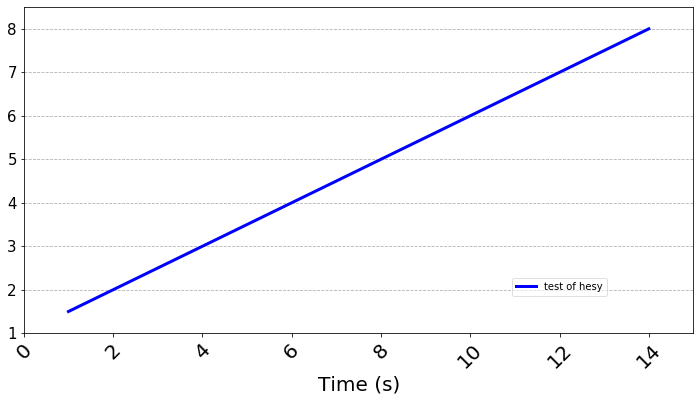

In [9]:
######### recommend axex usage ######### 
fig,ax = plt.subplots() # differ from plt.subplot() which adds a subplot to the current figure , subplots adds subplots to a new figure and return both
# fig, ax = plt.subplots(2,1,figsize(14,7))
# ax[0].***
# ax[1].***

""" this is my commly used settings """
ax.plot(np.array(range(1,15)),
        np.array(range(1,15)),
        label='generated by ax',
        color='b',
        linewidth=3.0
       )
ax.grid(axis="y",linestyle='--')	# set grid ,default axis is both of x and y, and line of "-"
ax.set_xlabel('Time (s)', fontsize=20)	# label setting , fontweight="bold" is ugly ,fontdict也可以（including size ,label）
ax.xaxis.set_tick_params(labelsize=20,rotation=45)	# tick setting ( larger and will get bold )
ax.set_yticklabels(range(1,15),fontsize=15)

### keep the figure range
ax.set_xlim(0, int(math.ceil(20)))
plt.axis([0, 15, 0, 15])

fig.set_size_inches(12, 6)

# legend setting 
handlers, labels = ax.get_legend_handles_labels()  # handler is the line object (e.g. Line2D once you print it out)
ax.legend( handlers, labels,loc='lower center',bbox_to_anchor=(0.8,0.1) )
# """
### method 1
lgd = ax.legend(handlers, labels, scatterpoints=1, bbox_to_anchor=(0.5, -0.1), 
      loc='upper center', ncol=2, fontsize=20,framealpha=0.6)    # bbox_to_anchor(bigger and righter, bigger and upper), loc is governed by bbox_to_anchor
fig.savefig("fig.svg", bbox_extra_artists=(lgd,),bbox_inches='tight', pad_inches=0.1,type = "svg")   
# """
"""
### method 2
plt.legend(handlers[:],["test1","test2"],prop = {'size':20},loc='lower center',bbox_to_anchor=(0.8,0.1),framealpha=0.6)	 # framealpha controls transparency
fig.savefig("fig.svg",bbox_inches='tight', pad_inches=0.1,type = "svg")  
"""

######### not recommend plt, but quick for subplooting recursively ######### 
"""
plt.subplots_adjust(wspace =0.998, hspace=0.2, left= 0.2 , right=0.8)#调整子图间距
plt.figure()
for city in range(3):
    for day in range(5):   
        plt.subplot(131+city)
        plt.plot( range(traffic_data.shape[1]),traffic_data[day_index+day,:,city_index+city] )
        plt.legend([f"day{str(i+10)}" for i in range(10)])
        plt.xlabel("time")
        plt.ylabel("traffic_flow")
"""

### 双y轴画法

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0.98, 'hesyTemplate')

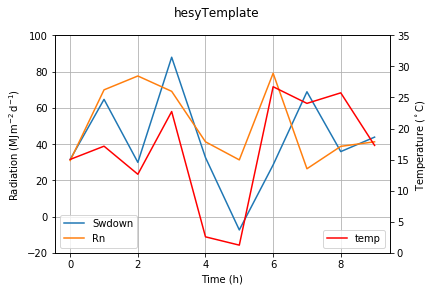

In [1]:
from matplotlib import rc
rc('mathtext', default='regular')

time = np.arange(10)
temp = np.random.random(10)*30
Swdown = np.random.random(10)*100-10
Rn = np.random.random(10)*100-10

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, Swdown, '-', label = 'Swdown')
ax.plot(time, Rn, '-', label = 'Rn')
ax2 = ax.twinx()
ax2.plot(time, temp, '-r', label = 'temp')

ax.legend(loc="lower left")
ax.grid()
ax.set_xlabel("Time (h)")
ax.set_ylabel(r"Radiation ($MJ\,m^{-2}\,d^{-1}$)")

ax2.set_ylabel(r"Temperature ($^\circ$C)")
ax2.set_ylim(0, 35)
ax.set_ylim(-20,100)
ax2.legend(loc="lower right")

fig.suptitle("hesyTemplate")

<br><br><br>


-----

## seaborn

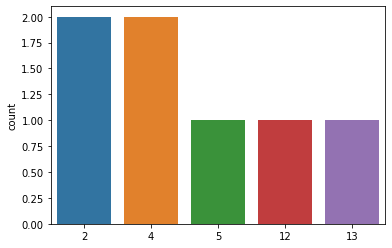

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
# for jupyetr u need this
sns.countplot([13,2,2,4,12,5,4])  # histgram

<br><br>

---

# numpy常用/好用API

## np.tile
针对整个数组进行操作

In [81]:
mat = np.array([[1,2], [3, 4]])

**只能通过np.tile的方式调用**

**默认横线tile**

In [84]:
np.tile(mat,(1, 4))
np.tile(mat, 4)

array([[1, 2, 1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4, 3, 4]])

array([[1, 2, 1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4, 3, 4]])

In [83]:
np.tile(mat, (3, 1))

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

## np.repeat 逐元素进行操作

In [78]:
np.repeat(7.,4)

array([7., 7., 7., 7.])

**通过np调用 以及 array的API调用，是一样的效果**

In [79]:
a=np.array([10,20])
a.repeat([3,2])

np.repeat(a,[3,2])

array([10, 10, 10, 20, 20])

array([10, 10, 10, 20, 20])

**同样，也不会改变shape**

In [80]:
a=np.array([[10,20],[30,40]])
a.repeat([3,2],axis=0)

a.repeat([3,2],axis=1)

array([[10, 20],
       [10, 20],
       [10, 20],
       [30, 40],
       [30, 40]])

array([[10, 10, 10, 20, 20],
       [30, 30, 30, 40, 40]])

# pandas常用API

先构造一个数据

In [22]:
data = [[0,1,2] for _ in range(2)]
data.append([1,1,2])
df = pd.DataFrame(data,columns =['a','b','c']) 
df

,a,b,c
0,0,1,2
1,0,1,2
2,1,1,2


##  查看内存占用

In [4]:
df.memory_usage(deep=True).sum() / 1024**2  # memory usage (MB)
df.info(memory_usage='deep')

0.00019073486328125

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3 non-null      int64
 1   1       3 non-null      int64
 2   2       3 non-null      int64
dtypes: int64(3)
memory usage: 200.0 bytes


## 灵活操作(利用pandas的优化API)

In [30]:
df.a.isin([0,1])
df[df.a.isin([0,1])]  # select via bool matrix
df.select_dtypes(["int16"])  # select via dtype
df.select_dtypes(["int"])
df.a.unique()

0    True
1    True
2    True
Name: a, dtype: bool

,a,b,b
0,0,1,2
1,0,1,2
2,1,1,2


""
0
1
2


,a,b,b
0,0,1,2
1,0,1,2
2,1,1,2


array([0, 1])

In [20]:
df.columns
df.drop_duplicates((["b","a"]))
df.drop_duplicates((["b"]))

Index(['a', 'b', 'b'], dtype='object')

,a,b,b
0,0,1,2
2,1,1,2


,a,b,b
0,0,1,2


## groupby常见使用方法

一般是喜欢和apply,filter等一起操作 , 输出的size会跟聚合的情况有关

In [38]:
df

,a,b,c,rank_test,rank_test2
0,0,1,2,1.5,1
1,0,1,2,1.5,1
2,1,1,2,1.0,1


In [39]:
df.groupby(["a","b"]).apply(sum)
df.groupby(["a","b"])["c"].apply(sum)

,,a,b,c,rank_test,rank_test2
a,b,,,,,
0,1,0.0,2.0,4.0,3.0,2.0
1,1,1.0,1.0,2.0,1.0,1.0


a  b
0  1    4
1  1    2
Name: c, dtype: int64

tranform则不会改变size （[refer](https://www.bilibili.com/video/BV1kJ411V7pb?from=search&seid=5227670558409086690)）

In [40]:
df.groupby(["a","b"]).transform(sum) 

,c,rank_test,rank_test2
0,4,3.0,2
1,4,3.0,2
2,2,1.0,1


其他用法

In [ ]:
df.groupby(["a","b"]).rank() # return a DataFrame type
df.groupby(["a"])["b"].rank() 
    # 默认的排序方式是average-->针对重合的如何排名
df['rank_test'] = df.groupby(["a","b"]).rank()
    # 其实这个astype(int)完全可以通过groupby的method参数进行调整
df['rank_test2'] = df.groupby(["a"])["b"].rank().astype(int)
df

In [22]:
np.random.choice(a=df.a, size=3, replace=False, p=[0.2, 0.1, 0.7])

array([1, 0, 0])

## python list , numpy , pandas 视图与副本

In [55]:
import numpy as np
import pandas as pd

listData=[ [1,2,3],[1,2,3],[1,2,3] ]
npData = np.array(listData)
pdData = pd.DataFrame(listData,columns = ['a','b','c'],index=['d','e','f'])

<div class="alert alert-block alert-info">
<b>list</b> 只有切片会返回副本（但还是浅拷贝），其余操作都是视图 , 除非索引到了
</div>

In [49]:
listData_slice = listData[:]
listData_slice[2]=1
listData_slice
listData

[[1, 2, 3], [1, 2, 3], 1]

[[1, 2, 3], [1, 2, 3], [1, 2, 3]]

In [56]:
listData_slice = listData[2]
listData_slice[2]=9
listData_slice
listData

[1, 2, 9]

[[1, 2, 3], [1, 2, 3], [1, 2, 9]]

<div class="alert alert-block alert-info">
<b>np.array</b> 所有都是返回视图，底层的所有数据都是公用的
</div>

In [46]:
npData_slice = npData
npData_slice[2] = 9    # 哈哈，又掌握了一个 给array整行赋值的一个方式
npData_slice
npData

array([[1, 2, 3],
       [1, 2, 3],
       [9, 9, 9]])

array([[1, 2, 3],
       [1, 2, 3],
       [9, 9, 9]])

<div class="alert alert-block alert-info">
<b>DataFrame</b> 是基于np.array的一个数据结构，自然也是如此
</div>

In [47]:
pdData_slice = pdData
pdData_slice[2] = 9
pdDddata_slice
pdData

,a,b,c,2
d,1,2,3,9
e,1,2,3,9
f,1,2,3,9


,a,b,c,2
d,1,2,3,9
e,1,2,3,9
f,1,2,3,9


# argparse
[官网的reference](https://docs.python.org/zh-cn/3/library/argparse.html#argparse.ArgumentParser.add_argument)

**sample**
* 没有指定dest,则默认为第一个长选项，没有再找短选项；指定了dest，就赋值到dest变量上

* 测试方法：parser.parse_args('-f 1 -x 2'.split())

```bash
>>> parser = argparse.ArgumentParser()
>>> parser.add_argument('-f', '--foo-bar', '--foo') 
>>> parser.add_argument('-x', '-y')
>>> parser.parse_args('-f 1 -x 2'.split())
Namespace(foo_bar='1', x='2')
>>> parser.parse_args('--foo 1 -y 2'.split())
Namespace(foo_bar='1', x='2')
```

* 一般来说长参数选项(--xx)的名字会比较长，但是短参数选项(-x)的名字会比较短。但是我自己并感到无所谓。

## 整体流程

In [4]:
import argparse
parser = argparse.ArgumentParser(description="Demo of argparse")
parser.add_argument( '--xx','-x' ,dest="hesyTestVar",help="input a float to test",type=float )
args = parser.parse_args()

## 参数解释

### type

In [4]:
parser.add_argument('-name', type=str, required=True)  # required mandatorily ; type:int/bool

### metavar & nargs

In [4]:
parser.add_argument('--integers', metavar='3 4 5', nargs='+', help='an integer for the accumulator')

usage: lp_decision.py [-h] [--integers 3 4 5 [3 4 5 ...]] [--sum]  # nargs='+'表示会把所有的输入集合到一个list里面

In [4]:
parser.add_argument('--integers', metavar='3 4 5', help='an integer for the accumulator')

usage: lp_decision.py [-h] [--integers 3 4 5] [--sum]    

### action

In [ ]:
# store_true 像个开关选项一样
parser.add_argument('-t',action='store_true')

# store_const 是否存储到const常量中去
parser.add_argument('--sum', dest='accumulate', action='store_const',const=sum, default=max,
                    help='sum the integers (default: find the max)')

<br><br>

----